In [1]:
import os
from pathlib import Path

parent_path =Path(r'D:\images\tnia-python-images\imagesc\2024_08_19_Dapi_CJ') 

# find all .tif files in the parent_path (not recursive)
files = [f for f in parent_path.glob('*.tif')]

print(files)


[WindowsPath('D:/images/tnia-python-images/imagesc/2024_08_19_Dapi_CJ/Channel0_SL01_rescale_0.25.tif'), WindowsPath('D:/images/tnia-python-images/imagesc/2024_08_19_Dapi_CJ/Channel0_SL2_rescale_0.25.tif')]


In [2]:
from cellpose import models, io
from tnia.plotting.plt_helper import imshow_multi2d

mod = models.Cellpose(gpu=True, model_type="cyto3")

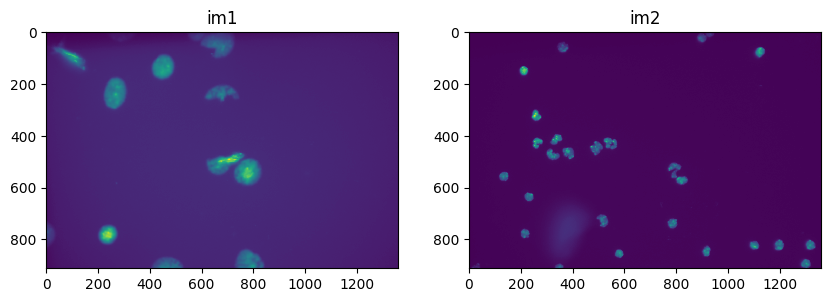

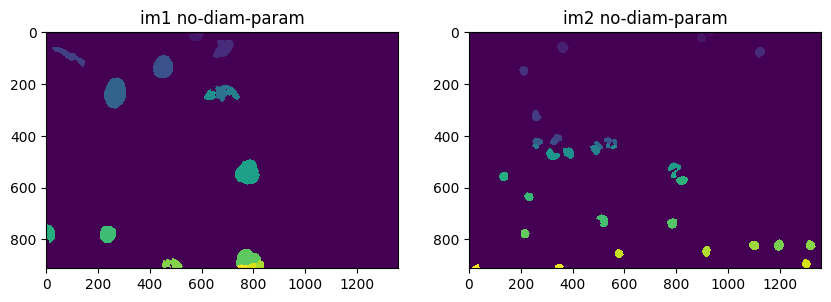

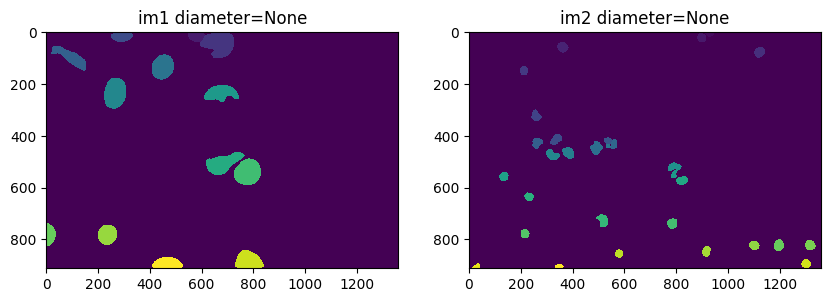

In [3]:

masks = []
imgs = []
for f in files:
    img = io.imread(f)
    imgs.append(img)

fig = imshow_multi2d(imgs, ["im1", "im2"], 1,2)

masks_default=[]
for img in imgs:
    mask, flows, styles, diams = mod.eval(img, channels=[0,0])
    masks_default.append(mask)

fig = imshow_multi2d(masks_default, ["im1 no-diam-param", "im2 no-diam-param"], 1,2)

masks_none=[]
for img in imgs:
    mask, flows, styles, diams = mod.eval(img, diameter=None, channels=[0,0])
    masks_none.append(mask)

fig = imshow_multi2d(masks_none, ["im1 diameter=None", "im2 diameter=None"], 1,2)

In [13]:
import napari
viewer = napari.Viewer()
viewer.add_image(imgs[0])
viewer.add_labels(masks_default[0])
viewer.add_labels(masks_none[0])
viewer.add_image(imgs[1])
viewer.add_labels(masks_none[1])
viewer.add_labels(masks_default[1])

<Labels layer 'Labels [3]' at 0x1ad8938ddb0>